<a href="https://colab.research.google.com/github/Sedowlas/Cat-Boost/blob/main/Titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка данных

https://drive.google.com/file/d/1X8mifvjwWvlphLM5Xqz64B4YE7i9GE_m/view?usp=sharing

In [ ]:
! gdown 1X8mifvjwWvlphLM5Xqz64B4YE7i9GE_m

Downloading...
From: https://drive.google.com/uc?id=1X8mifvjwWvlphLM5Xqz64B4YE7i9GE_m
To: /content/titanic.zip
100% 34.9k/34.9k [00:00<00:00, 41.5MB/s]


In [ ]:
! unzip /content/titanic.zip

Archive:  /content/titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Предобработка

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
len(df)

891

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.isna().mean()

passengerid    0.000000
survived       0.000000
pclass         0.000000
name           0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
ticket         0.000000
fare           0.000000
cabin          0.771044
embarked       0.002245
dtype: float64

#Анализ

In [ ]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

Узнали сколько человек выжило:   
0 - не выжили  
1 - выжили

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df.groupby('age',dropna=False)['survived'].agg(['count','mean'])

,count,mean
age,,
0.42,1,1.000000
0.67,1,1.000000
0.75,2,1.000000
0.83,2,1.000000
0.92,1,1.000000
1.00,7,0.714286
2.00,10,0.300000
3.00,6,0.833333
4.00,10,0.700000


Информация по возрасту всех пассажиров.

In [ ]:
df['age_group'] = pd.cut(df['age'],5)

Делаем группу по возрасту и посмотрим по выжившим.

In [ ]:
df.groupby('age_group',dropna=False)['survived'].agg(['count','mean'])

,count,mean
age_group,,
"(0.34, 16.336]",100,0.550000
"(16.336, 32.252]",346,0.369942
"(32.252, 48.168]",188,0.404255
"(48.168, 64.084]",69,0.434783
"(64.084, 80.0]",11,0.090909


Видим, что в процентном соотношении, больше всего людей выжило в возрасте от 16-48 лет. 

In [ ]:
df.groupby('name')['survived'].agg(['count','mean'])

,count,mean
name,,
"Abbing, Mr. Anthony",1,0.0
"Abbott, Mr. Rossmore Edward",1,0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1,1.0
"Abelson, Mr. Samuel",1,0.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",1,1.0
"Adahl, Mr. Mauritz Nils Martin",1,0.0
"Adams, Mr. John",1,0.0
"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",1,0.0
"Aks, Mrs. Sam (Leah Rosen)",1,1.0


Узнали все имена выживших и погибших пассажиров. 

In [ ]:
df.groupby('sex')['survived'].agg(['count','mean'])

,count,mean
sex,,
female,314,0.742038
male,577,0.188908


Поняли что женщин выжило больше чем мужчин, очень странно, потому-что здесь явно видно что разлет слишком большой!  
Может стоит посмотреть на график?

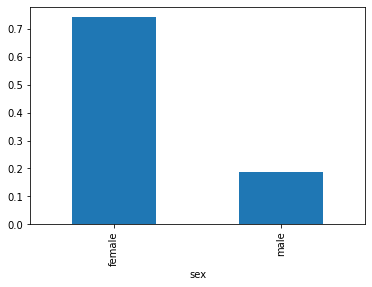

In [ ]:
df.groupby('sex')['survived'].mean().plot(kind='bar')

Действительно! На графике мы так же видим, что женщин выжило больше чем мужчин.
С чем это может быть связано? Может дело в расположении кают?  

In [ ]:
df.groupby('name')['pclass'].agg(['count','mean'])

,count,mean
name,,
"Abbing, Mr. Anthony",1,3.0
"Abbott, Mr. Rossmore Edward",1,3.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1,3.0
"Abelson, Mr. Samuel",1,2.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",1,2.0
"Adahl, Mr. Mauritz Nils Martin",1,3.0
"Adams, Mr. John",1,3.0
"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",1,3.0
"Aks, Mrs. Sam (Leah Rosen)",1,3.0


Узнали класс кают пассажиров:  
1 - Верхний  
2 - Средний  
3 - Низкий  

In [ ]:
(df.groupby(['name'],dropna=False)
[['sibsp']]
 .agg(['count','mean']))

sibsp     
                                                   count mean
name                                                         
Abbing, Mr. Anthony                                    1  0.0
Abbott, Mr. Rossmore Edward                            1  1.0
Abbott, Mrs. Stanton (Rosa Hunt)                       1  1.0
Abelson, Mr. Samuel                                    1  1.0
Abelson, Mrs. Samuel (Hannah Wizosky)                  1  1.0
Adahl, Mr. Mauritz Nils Martin                         1  0.0
Adams, Mr. John                                        1  0.0
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)         1  1.0
Aks, Mrs. Sam (Leah Rosen)                             1  0.0
Albimona, Mr. Nassef Cassem                            1  0.0
Alexander, Mr. William                                 1  0.0
Alhomaki, Mr. Ilmari Rudolf                            1  0.0
Ali, Mr. Ahmed                                         1  0.0
Ali, Mr. William                                       1  0.0
Allen, Miss. Elisabeth Walton                          1  0.0
Allen, Mr. William Henry                               1  0.0
Allison, Master. Hudson Trevor                         1  1.0
Allison, Miss. Helen Loraine                           1  1.0
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)        1  1.0
Allum, Mr. Owen George                                 1  0.0
Andersen-Jensen, Miss. Carla Christine Nielsine        1  1.0
Anderson, Mr. Harry                                    1  0.0
Andersson, Master. Sigvard Harald Elias                1  4.0
Andersson, Miss. Ebba Iris Alfrida                     1  4.0
Andersson, Miss. Ellis Anna Maria                      1  4.0
Andersson, Miss. Erna Alexandra                        1  4.0
Andersson, Miss. Ingeborg Constanzia                   1  4.0
Andersson, Miss. Sigrid Elisabeth                      1  4.0
Andersson, Mr. Anders Johan                            1  1.0
Andersson, Mr. August Edvard ("Wennerstrom")           1  0.0
Andersson, Mrs. Anders Johan (Alfrida Konstanti...     1  1.0
Andreasson, Mr. Paul Edvin                             1  0.0
Andrew, Mr. Edgardo Samuel                             1  0.0
Andrews, Miss. Kornelia Theodosia                      1  1.0
Andrews, Mr. Thomas Jr                                 1  0.0
Angle, Mrs. William A (Florence "Mary" Agnes Hu...     1  1.0
Appleton, Mrs. Edward Dale (Charlotte Lamson)          1  2.0
Arnold-Franchi, Mr. Josef                              1  1.0
Arnold-Franchi, Mrs. Josef (Josefine Franchi)          1  1.0
Artagaveytia, Mr. Ramon                                1  0.0
Asim, Mr. Adola                                        1  0.0
Asplund, Master. Clarence Gustaf Hugo                  1  4.0
Asplund, Master. Edvin Rojj Felix                      1  4.0
Asplund, Miss. Lillian Gertrud                         1  4.0
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia ...     1  1.0
Astor, Mrs. John Jacob (Madeleine Talmadge Force)      1  1.0
Attalah, Miss. Malake                                  1  0.0
Attalah, Mr. Sleiman                                   1  0.0
Aubart, Mme. Leontine Pauline                          1  0.0
Augustsson, Mr. Albert                                 1  0.0
Ayoub, Miss. Banoura                                   1  0.0
Backstrom, Mr. Karl Alfred                             1  1.0
Backstrom, Mrs. Karl Alfred (Maria Mathilda Gus...     1  3.0
Baclini, Miss. Eugenie                                 1  2.0
Baclini, Miss. Helene Barbara                          1  2.0
Baclini, Miss. Marie Catherine                         1  2.0
Baclini, Mrs. Solomon (Latifa Qurban)                  1  0.0
Badt, Mr. Mohamed                                      1  0.0
Bailey, Mr. Percy Andrew                               1  0.0
Balkic, Mr. Cerin                                      1  0.0
Ball, Mrs. (Ada E Hall)                                1  0.0
Banfield, Mr. Frederick James                          1  0.0
Barah, Mr. Hanna Assi

sibsp - Родственники пассажиров на титанике (сестры, братья)  
Узнали сколько родственников было или не было на титанике у каджого пассажира.

In [ ]:
(df.groupby(['name'],dropna=False)
[['parch']]
 .agg(['count','mean']))

parch     
                                                   count mean
name                                                         
Abbing, Mr. Anthony                                    1  0.0
Abbott, Mr. Rossmore Edward                            1  1.0
Abbott, Mrs. Stanton (Rosa Hunt)                       1  1.0
Abelson, Mr. Samuel                                    1  0.0
Abelson, Mrs. Samuel (Hannah Wizosky)                  1  0.0
Adahl, Mr. Mauritz Nils Martin                         1  0.0
Adams, Mr. John                                        1  0.0
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)         1  0.0
Aks, Mrs. Sam (Leah Rosen)                             1  1.0
Albimona, Mr. Nassef Cassem                            1  0.0
Alexander, Mr. William                                 1  0.0
Alhomaki, Mr. Ilmari Rudolf                            1  0.0
Ali, Mr. Ahmed                                         1  0.0
Ali, Mr. William                                       1  0.0
Allen, Miss. Elisabeth Walton                          1  0.0
Allen, Mr. William Henry                               1  0.0
Allison, Master. Hudson Trevor                         1  2.0
Allison, Miss. Helen Loraine                           1  2.0
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)        1  2.0
Allum, Mr. Owen George                                 1  0.0
Andersen-Jensen, Miss. Carla Christine Nielsine        1  0.0
Anderson, Mr. Harry                                    1  0.0
Andersson, Master. Sigvard Harald Elias                1  2.0
Andersson, Miss. Ebba Iris Alfrida                     1  2.0
Andersson, Miss. Ellis Anna Maria                      1  2.0
Andersson, Miss. Erna Alexandra                        1  2.0
Andersson, Miss. Ingeborg Constanzia                   1  2.0
Andersson, Miss. Sigrid Elisabeth                      1  2.0
Andersson, Mr. Anders Johan                            1  5.0
Andersson, Mr. August Edvard ("Wennerstrom")           1  0.0
Andersson, Mrs. Anders Johan (Alfrida Konstanti...     1  5.0
Andreasson, Mr. Paul Edvin                             1  0.0
Andrew, Mr. Edgardo Samuel                             1  0.0
Andrews, Miss. Kornelia Theodosia                      1  0.0
Andrews, Mr. Thomas Jr                                 1  0.0
Angle, Mrs. William A (Florence "Mary" Agnes Hu...     1  0.0
Appleton, Mrs. Edward Dale (Charlotte Lamson)          1  0.0
Arnold-Franchi, Mr. Josef                              1  0.0
Arnold-Franchi, Mrs. Josef (Josefine Franchi)          1  0.0
Artagaveytia, Mr. Ramon                                1  0.0
Asim, Mr. Adola                                        1  0.0
Asplund, Master. Clarence Gustaf Hugo                  1  2.0
Asplund, Master. Edvin Rojj Felix                      1  2.0
Asplund, Miss. Lillian Gertrud                         1  2.0
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia ...     1  5.0
Astor, Mrs. John Jacob (Madeleine Talmadge Force)      1  0.0
Attalah, Miss. Malake                                  1  0.0
Attalah, Mr. Sleiman                                   1  0.0
Aubart, Mme. Leontine Pauline                          1  0.0
Augustsson, Mr. Albert                                 1  0.0
Ayoub, Miss. Banoura                                   1  0.0
Backstrom, Mr. Karl Alfred                             1  0.0
Backstrom, Mrs. Karl Alfred (Maria Mathilda Gus...     1  0.0
Baclini, Miss. Eugenie                                 1  1.0
Baclini, Miss. Helene Barbara                          1  1.0
Baclini, Miss. Marie Catherine                         1  1.0
Baclini, Mrs. Solomon (Latifa Qurban)                  1  3.0
Badt, Mr. Mohamed                                      1  0.0
Bailey, Mr. Percy Andrew                               1  0.0
Balkic, Mr. Cerin                                      1  0.0
Ball, Mrs. (Ada E Hall)                                1  0.0
Banfield, Mr. Frederick James                          1  0.0
Barah, Mr. Hanna Assi

parch - Родители пассажиров на титанике.  
Узнали какие пассажиры были с родителями и их количество.

In [ ]:
(df.groupby(['name','ticket'],dropna=False)
[['survived']]
 .agg(['count','mean']))

survived  \
                                                                         count   
name                                               ticket                        
Abbing, Mr. Anthony                                C.A. 5547                 1   
Abbott, Mr. Rossmore Edward                        C.A. 2673                 1   
Abbott, Mrs. Stanton (Rosa Hunt)                   C.A. 2673                 1   
Abelson, Mr. Samuel                                P/PP 3381                 1   
Abelson, Mrs. Samuel (Hannah Wizosky)              P/PP 3381                 1   
Adahl, Mr. Mauritz Nils Martin                     C 7076                    1   
Adams, Mr. John                                    341826                    1   
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)     7546                      1   
Aks, Mrs. Sam (Leah Rosen)                         392091                    1   
Albimona, Mr. Nassef Cassem                        2699                      1   
Alexander, Mr. William                             3474                      1   
Alhomaki, Mr. Ilmari Rudolf                        SOTON/O2 3101287          1   
Ali, Mr. Ahmed                                     SOTON/O.Q. 3101311        1   
Ali, Mr. William                                   SOTON/O.Q. 3101312        1   
Allen, Miss. Elisabeth Walton                      24160                     1   
Allen, Mr. William Henry                           373450                    1   
Allison, Master. Hudson Trevor                     113781                    1   
Allison, Miss. Helen Loraine                       113781                    1   
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    113781                    1   
Allum, Mr. Owen George                             2223                      1   
Andersen-Jensen, Miss. Carla Christine Nielsine    350046                    1   
Anderson, Mr. Harry                                19952                     1   
Andersson, Master. Sigvard Harald Elias            347082                    1   
Andersson, Miss. Ebba Iris Alfrida                 347082                    1   
Andersson, Miss. Ellis Anna Maria                  347082                    1   
Andersson, Miss. Erna Alexandra                    3101281                   1   
Andersson, Miss. Ingeborg Constanzia               347082                    1   
Andersson, Miss. Sigrid Elisabeth                  347082                    1   
Andersson, Mr. Anders Johan                        347082                    1   
Andersson, Mr. August Edvard ("Wennerstrom")       350043                    1   
Andersson, Mrs. Anders Johan (Alfrida Konstanti... 347082                    1   
Andreasson, Mr. Paul Edvin                         347466                    1   
Andrew, Mr. Edgardo Samuel                         231945                    1   
Andrews, Miss. Kornelia Theodosia                  13502                     1   
Andrews, Mr. Thomas Jr                             112050                    1   
Angle, Mrs. William A (Florence "Mary" Agnes Hu... 226875                    1   
Appleton, Mrs. Edward Dale (Charlotte Lamson)      11769                     1   
Arnold-Franchi, Mr. Josef                          349237                    1   
Arnold-Franchi, Mrs. Josef (Josefine Franchi)      349237                    1   
Artagaveytia, Mr. Ramon                            PC 17609                  1   
Asim, Mr. Adola                                    SOTON/O.Q. 3101310        1   
Asplund, Master. Clarence Gustaf Hugo              347077                    1   
Asplund, Master. Edvin Rojj Felix                  347077                    1   
Asplund, Miss. Lillian Gertrud                     347077                    1   
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia ... 347077                    1   
Astor, Mrs. John Jacob (Madeleine Talmadge Force)  PC 17757                  1   
Attalah, Miss. Malake                              2

Узнали номера билетов пассажиров по именам и выжили ли они.

In [ ]:
(df.groupby(['embarked'],dropna=False)
[['survived']]
 .agg(['count','mean']))

survived          
            count      mean
embarked                   
C             168  0.553571
Q              77  0.389610
S             644  0.336957
NaN             2  1.000000

embarked - Порт посадки.  
C = Шербур, Q = Квинстаун, S = Саутгемптон.  
Видим что в порту C людей выжило больше чем в остальных, но большая часть людей высадилась в порту S.

In [ ]:
(df.groupby(['name','embarked'],dropna=False)
[['survived']]
 .agg(['count','mean']))

survived     
                                                               count mean
name                                               embarked              
Abbing, Mr. Anthony                                S               1  0.0
Abbott, Mr. Rossmore Edward                        S               1  0.0
Abbott, Mrs. Stanton (Rosa Hunt)                   S               1  1.0
Abelson, Mr. Samuel                                C               1  0.0
Abelson, Mrs. Samuel (Hannah Wizosky)              C               1  1.0
Adahl, Mr. Mauritz Nils Martin                     S               1  0.0
Adams, Mr. John                                    S               1  0.0
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)     S               1  0.0
Aks, Mrs. Sam (Leah Rosen)                         S               1  1.0
Albimona, Mr. Nassef Cassem                        C               1  1.0
Alexander, Mr. William                             S               1  0.0
Alhomaki, Mr. Ilmari Rudolf                        S               1  0.0
Ali, Mr. Ahmed                                     S               1  0.0
Ali, Mr. William                                   S               1  0.0
Allen, Miss. Elisabeth Walton                      S               1  1.0
Allen, Mr. William Henry                           S               1  0.0
Allison, Master. Hudson Trevor                     S               1  1.0
Allison, Miss. Helen Loraine                       S               1  0.0
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    S               1  0.0
Allum, Mr. Owen George                             S               1  0.0
Andersen-Jensen, Miss. Carla Christine Nielsine    S               1  1.0
Anderson, Mr. Harry                                S               1  1.0
Andersson, Master. Sigvard Harald Elias            S               1  0.0
Andersson, Miss. Ebba Iris Alfrida                 S               1  0.0
Andersson, Miss. Ellis Anna Maria                  S               1  0.0
Andersson, Miss. Erna Alexandra                    S               1  1.0
Andersson, Miss. Ingeborg Constanzia               S               1  0.0
Andersson, Miss. Sigrid Elisabeth                  S               1  0.0
Andersson, Mr. Anders Johan                        S               1  0.0
Andersson, Mr. August Edvard ("Wennerstrom")       S               1  1.0
Andersson, Mrs. Anders Johan (Alfrida Konstanti... S               1  0.0
Andreasson, Mr. Paul Edvin                         S               1  0.0
Andrew, Mr. Edgardo Samuel                         S               1  0.0
Andrews, Miss. Kornelia Theodosia                  S               1  1.0
Andrews, Mr. Thomas Jr                             S               1  0.0
Angle, Mrs. William A (Florence "Mary" Agnes Hu... S               1  1.0
Appleton, Mrs. Edward Dale (Charlotte Lamson)      S               1  1.0
Arnold-Franchi, Mr. Josef                          S               1  0.0
Arnold-Franchi, Mrs. Josef (Josefine Franchi)      S               1  0.0
Artagaveytia, Mr. Ramon                            C               1  0.0
Asim, Mr. Adola                                    S               1  0.0
Asplund, Master. Clarence Gustaf Hugo              S               1  0.0
Asplund, Master. Edvin Rojj Felix                  S               1  1.0
Asplund, Miss. Lillian Gertrud                     S               1  1.0
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia ... S               1  1.0
Astor, Mrs. John Jacob (Madeleine Talmadge Force)  C               1  1.0
Attalah, Miss. Malake                              C               1  0.0
Attalah, Mr. Sleiman                               C               1  0.0
Aubart, Mme. Leontine Pauline                      C               1  1.0
Augustsson, Mr. Albert                             S               1  0.0
Ayoub, Miss. Banoura                               C               1  1.0
Backstrom, Mr. Karl Alfred                         S            

Узнали имена людей, в каком порту они высадились и количество выживших.

In [ ]:
(df.groupby(['sex','name','cabin','ticket','embarked'],dropna=False)
[['pclass','sibsp','parch','fare','survived']]
 .agg({'pclass':['count','mean'],
       'sibsp':['mean'],
       'parch':['mean'],
       'fare':['mean'],
       'survived':['mean']}))

pclass  \
                                                                                                       count   
sex    name                                               cabin           ticket             embarked          
female Abbott, Mrs. Stanton (Rosa Hunt)                   NaN             C.A. 2673          S             1   
       Abelson, Mrs. Samuel (Hannah Wizosky)              NaN             P/PP 3381          C             1   
       Ahlin, Mrs. Johan (Johanna Persdotter Larsson)     NaN             7546               S             1   
       Aks, Mrs. Sam (Leah Rosen)                         NaN             392091             S             1   
       Allen, Miss. Elisabeth Walton                      B5              24160              S             1   
       Allison, Miss. Helen Loraine                       C22 C26         113781             S             1   
       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    C22 C26         113781             S             1   
       Andersen-Jensen, Miss. Carla Christine Nielsine    NaN             350046             S             1   
       Andersson, Miss. Ebba Iris Alfrida                 NaN             347082             S             1   
       Andersson, Miss. Ellis Anna Maria                  NaN             347082             S             1   
       Andersson, Miss. Erna Alexandra                    NaN             3101281            S             1   
       Andersson, Miss. Ingeborg Constanzia               NaN             347082             S             1   
       Andersson, Miss. Sigrid Elisabeth                  NaN             347082             S             1   
       Andersson, Mrs. Anders Johan (Alfrida Konstanti... NaN             347082             S             1   
       Andrews, Miss. Kornelia Theodosia                  D7              13502              S             1   
       Angle, Mrs. William A (Florence "Mary" Agnes Hu... NaN             226875             S             1   
       Appleton, Mrs. Edward Dale (Charlotte Lamson)      C101            11769              S             1   
       Arnold-Franchi, Mrs. Josef (Josefine Franchi)      NaN             349237             S             1   
       Asplund, Miss. Lillian Gertrud                     NaN             347077             S             1   
       Asplund, Mrs. Carl Oscar (Selma Augusta Emilia ... NaN             347077             S             1   
       Astor, Mrs. John Jacob (Madeleine Talmadge Force)  C62 C64         PC 17757           C             1   
       Attalah, Miss. Malake                              NaN             2627               C             1   
       Aubart, Mme. Leontine Pauline                      B35             PC 17477           C             1   
       Ayoub, Miss. Banoura                               NaN             2687               C             1   
       Backstrom, Mrs. Karl Alfred (Maria Mathilda Gus... NaN             3101278            S             1   
       Baclini, Miss. Eugenie                             NaN             2666               C             1   
       Baclini, Miss. Helene Barbara                      NaN             2666               C             1   
       Baclini, Miss. Marie Catherine                     NaN             2666               C             1   
       Baclini, Mrs. Solomon (Latifa Qurban)              NaN             2666               C             1   
       Ball, Mrs. (Ada E Hall)                            D               28551              S             1   
       Barbara, Miss. Saiide                              NaN             2691               C             1   
       Barbara, Mrs. (Catherine David)                    NaN             2691               C             1   
       Barber, Miss. Ellen "Nellie"                       NaN             19877              S             1   
       Baxter, Mrs. James (Helene DeLaudeniere Chaput)    B58 B60     

Сделали общий сводник по всем колонкам для полного анализа и для точного просмотра данных.

In [ ]:
df.isna().mean()

passengerid    0.000000
survived       0.000000
pclass         0.000000
name           0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
ticket         0.000000
fare           0.000000
cabin          0.771044
embarked       0.002245
age_group      0.198653
dtype: float64

#Разбивка данных на train, val и test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df,train_size=0.6,random_state=42)

In [ ]:
val, test = train_test_split(test,train_size=0.5,random_state=42)

In [ ]:
train['survived'].mean()

0.37640449438202245

In [ ]:
val['survived'].mean()

0.3651685393258427

In [ ]:
test['survived'].mean()

0.4245810055865922

Заменяю пропуски

In [ ]:
train['age'] = train['age'].fillna(0)

In [ ]:
train[['cabin','embarked']] = train[['cabin','embarked']].fillna('no_info')

In [ ]:
test['age'] = test['age'].fillna(0)

In [ ]:
test[['cabin','embarked']] = test[['cabin','embarked']].fillna('no_info')

In [ ]:
val['age'] = val['age'].fillna(0)

In [ ]:
val[['cabin','embarked']] = val[['cabin','embarked']].fillna('no_info')

#Phik

In [ ]:
train_full = pd.concat([train,val])

In [ ]:
! pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import phik

In [ ]:
phik_overview = train_full.phik_matrix()

interval columns not set, guessing: ['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


In [ ]:
phik_overview['survived'].sort_values(ascending=False)

survived       1.000000
name           1.000000
ticket         0.753561
sex            0.737236
cabin          0.428598
fare           0.256267
embarked       0.254031
pclass         0.189943
sibsp          0.170674
parch          0.162639
age_group      0.109169
passengerid    0.091378
age            0.000000
Name: survived, dtype: float64

#Машинное обучение

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
train_full.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'age_group'],
      dtype='object')

In [ ]:
X = ['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked']

cat_features = ['name', 'sex', 'ticket', 'cabin', 'embarked']

y = ['survived']

In [ ]:
params = {'cat_features' : cat_features,
            'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.6864417	test: 0.6874609	best: 0.6874609 (0)	total: 61ms	remaining: 1m
100:	learn: 0.4346737	test: 0.5030494	best: 0.5030494 (100)	total: 562ms	remaining: 5s
200:	learn: 0.3812510	test: 0.4695660	best: 0.4695660 (200)	total: 1.09s	remaining: 4.33s
300:	learn: 0.3530166	test: 0.4583218	best: 0.4583218 (300)	total: 1.54s	remaining: 3.59s
400:	learn: 0.3308540	test: 0.4505133	best: 0.4503158 (399)	total: 1.85s	remaining: 2.77s
500:	learn: 0.3166246	test: 0.4462876	best: 0.4462876 (500)	total: 2.1s	remaining: 2.1s
600:	learn: 0.3007740	test: 0.4455652	best: 0.4451987 (588)	total: 2.4s	remaining: 1.59s
700:	learn: 0.2880867	test: 0.4449174	best: 0.4447131 (699)	total: 2.83s	remaining: 1.21s
800:	learn: 0.2755161	test: 0.4452736	best: 0.4447131 (699)	total: 3.15s	remaining: 782ms
900:	learn: 0.2562980	test: 0.4456730	best: 0.4447131 (699)	total: 3.49s	remaining: 384ms
999:	learn: 0.2397884	test: 0.4483036	best: 0.4447131 (699)	total: 3.82s	remaining: 0us

bestTest = 0.4447131301
b

In [ ]:
test['pred_all'] = model.predict(test[X])

In [ ]:
test.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_group,pred_all
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,no_info,S,"(16.336, 32.252]",0
837,838,0,3,"Sirota, Mr. Maurice",male,0.0,0,0,392092,8.0500,no_info,S,NaN,0
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,no_info,Q,"(32.252, 48.168]",0
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,no_info,S,"(16.336, 32.252]",0
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,no_info,S,"(16.336, 32.252]",0


#Test

In [ ]:
dff = pd.read_csv('/content/test.csv')

In [ ]:
dff.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
dff.columns = dff.columns.str.lower()

In [ ]:
dff.isna().mean()

passengerid    0.000000
pclass         0.000000
name           0.000000
sex            0.000000
age            0.205742
sibsp          0.000000
parch          0.000000
ticket         0.000000
fare           0.002392
cabin          0.782297
embarked       0.000000
dtype: float64

In [ ]:
dff[['age','fare']] = dff[['age','fare']].fillna(0)

In [ ]:
dff[['cabin','embarked']] = dff[['cabin','embarked']].fillna('no_info')

In [ ]:
X = ['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked']

cat_features = ['name', 'sex', 'ticket', 'cabin', 'embarked']

y = ['survived']

In [ ]:
params = {'cat_features' : cat_features,
            'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.6864417	test: 0.6874609	best: 0.6874609 (0)	total: 2.2ms	remaining: 2.2s
100:	learn: 0.4346737	test: 0.5030494	best: 0.5030494 (100)	total: 334ms	remaining: 2.98s
200:	learn: 0.3812510	test: 0.4695660	best: 0.4695660 (200)	total: 761ms	remaining: 3.02s
300:	learn: 0.3530166	test: 0.4583218	best: 0.4583218 (300)	total: 1.24s	remaining: 2.87s
400:	learn: 0.3308540	test: 0.4505133	best: 0.4503158 (399)	total: 1.59s	remaining: 2.38s
500:	learn: 0.3166246	test: 0.4462876	best: 0.4462876 (500)	total: 1.89s	remaining: 1.88s
600:	learn: 0.3007740	test: 0.4455652	best: 0.4451987 (588)	total: 2.4s	remaining: 1.6s
700:	learn: 0.2880867	test: 0.4449174	best: 0.4447131 (699)	total: 2.68s	remaining: 1.14s
800:	learn: 0.2755161	test: 0.4452736	best: 0.4447131 (699)	total: 2.99s	remaining: 743ms
900:	learn: 0.2562980	test: 0.4456730	best: 0.4447131 (699)	total: 3.34s	remaining: 368ms
999:	learn: 0.2397884	test: 0.4483036	best: 0.4447131 (699)	total: 3.91s	remaining: 0us

bestTest = 0.44471

In [ ]:
dff['score'] = model.predict_proba(dff[X])[:,1]

In [ ]:
test['score'] = model.predict_proba(test[X])[:,1]

In [ ]:
dff.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,no_info,Q,0.129935
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,no_info,S,0.383439
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,no_info,Q,0.151951
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,no_info,S,0.073695
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,no_info,S,0.768141


In [ ]:
dff['survived_score'] = (dff['score'] > 0.5) * 1

In [ ]:
test['survived_score'] = (test['score'] > 0.5) * 1

In [ ]:
dff.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,score,survived_score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,no_info,Q,0.129935,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,no_info,S,0.383439,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,no_info,Q,0.151951,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,no_info,S,0.073695,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,no_info,S,0.768141,1


In [ ]:
dff.columns = ['PassengerId', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'score', 'Survived']

In [ ]:
df_new =dff[['PassengerId','Survived']].copy()

In [ ]:
df_new.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
df_new.to_csv('титаник.csv',index=False)

#Метрики

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

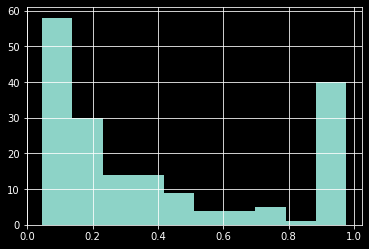

In [ ]:
test['score'].hist()

In [ ]:
train['survived'].mean()

0.37640449438202245

In [ ]:
test['Action'] = (test['score'] > 0.5) * 1

In [ ]:
test

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_group,pred_all,score,survived_score,Action
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.2125,no_info,S,"(16.336, 32.252]",0,0.195646,0,0
837,838,0,3,"Sirota, Mr. Maurice",male,0.00,0,0,392092,8.0500,no_info,S,NaN,0,0.068511,0,0
525,526,0,3,"Farrell, Mr. James",male,40.50,0,0,367232,7.7500,no_info,Q,"(32.252, 48.168]",0,0.151150,0,0
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.00,1,1,363291,20.5250,no_info,S,"(16.336, 32.252]",0,0.484168,0,0
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.00,0,0,C.A. 33111,10.5000,no_info,S,"(16.336, 32.252]",0,0.144973,0,0
83,84,0,1,"Carrau, Mr. Francisco M",male,28.00,0,0,113059,47.1000,no_info,S,"(16.336, 32.252]",0,0.160899,0,0
853,854,1,1,"Lines, Miss. Mary Conover",female,16.00,0,1,PC 17592,39.4000,D28,S,"(0.34, 16.336]",1,0.948094,1,1
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C,"(48.168, 64.084]",1,0.918873,1,1
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.00,0,0,345783,9.5000,no_info,S,"(16.336, 32.252]",0,0.117567,0,0
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.00,0,0,374887,7.2500,no_info,S,"(16.336, 32.252]",0,0.080850,0,0


In [ ]:
test['survived_score'].mean()

0.3016759776536313

##Матрица ошибок

In [ ]:
test

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_group,pred_all,score,survived_score,Action
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.2125,no_info,S,"(16.336, 32.252]",0,0.195646,0,0
837,838,0,3,"Sirota, Mr. Maurice",male,0.00,0,0,392092,8.0500,no_info,S,NaN,0,0.068511,0,0
525,526,0,3,"Farrell, Mr. James",male,40.50,0,0,367232,7.7500,no_info,Q,"(32.252, 48.168]",0,0.151150,0,0
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.00,1,1,363291,20.5250,no_info,S,"(16.336, 32.252]",0,0.484168,0,0
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.00,0,0,C.A. 33111,10.5000,no_info,S,"(16.336, 32.252]",0,0.144973,0,0
83,84,0,1,"Carrau, Mr. Francisco M",male,28.00,0,0,113059,47.1000,no_info,S,"(16.336, 32.252]",0,0.160899,0,0
853,854,1,1,"Lines, Miss. Mary Conover",female,16.00,0,1,PC 17592,39.4000,D28,S,"(0.34, 16.336]",1,0.948094,1,1
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C,"(48.168, 64.084]",1,0.918873,1,1
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.00,0,0,345783,9.5000,no_info,S,"(16.336, 32.252]",0,0.117567,0,0
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.00,0,0,374887,7.2500,no_info,S,"(16.336, 32.252]",0,0.080850,0,0


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(test['survived'],test['survived_score'])

array([[97,  6],
       [28, 48]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(test['survived'],test['survived_score']).ravel()

In [ ]:
tn, fp, fn, tp

(97, 6, 28, 48)

##Recall

In [ ]:
recall = tp / (tp + fn)

In [ ]:
recall

0.631578947368421

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(test['survived'],test['survived_score'])

0.631578947368421

##Precision

In [ ]:
precision = tp / (tp + fp)

In [ ]:
precision

0.8888888888888888

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(test['survived'],test['survived_score'])

0.8888888888888888

##F1

In [ ]:
f1 = (2 * recall * precision) / (recall + precision)

In [ ]:
f1

0.7384615384615385

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(test['survived'],test['survived_score'])

0.7384615384615385

##Classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test['survived'],test['survived_score']))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       103
           1       0.89      0.63      0.74        76

    accuracy                           0.81       179
   macro avg       0.83      0.79      0.79       179
weighted avg       0.82      0.81      0.80       179



In [ ]:
len(test['score'])

179

In [ ]:
test['score'].nunique()

179

In [ ]:
thrs = [0] + list(test['score'].unique())

In [ ]:
min(thrs)

0

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
result = []
for thr in tqdm(thrs):
  test['survived_new'] = (test['score'] > thr) * 1
  result.append((thr,
                 f1_score(test['survived'],test['survived_new'])))

  0%|          | 0/180 [00:00<?, ?it/s]

In [ ]:
result[:10]

[(0, 0.596078431372549),
 (0.19564561456772864, 0.7752808988764046),
 (0.06851064015538162, 0.6072874493927126),
 (0.15115000776001067, 0.7434554973821991),
 (0.4841676351513857, 0.7480916030534351),
 (0.14497304399475971, 0.7357512953367875),
 (0.1608991054282197, 0.7526881720430109),
 (0.9480937721631668, 0.29213483146067415),
 (0.9188733285624062, 0.46464646464646464),
 (0.11756681480790113, 0.6824644549763034)]

In [ ]:
t = pd.DataFrame(result,columns=['thr','f1'])

In [ ]:
t.sort_values('f1',ascending=False)

,thr,f1
28,0.295883,0.840764
31,0.305939,0.838710
170,0.287537,0.835443
106,0.301729,0.833333
127,0.309071,0.831169
92,0.274607,0.830189
136,0.262747,0.825000
123,0.317301,0.823529
157,0.260566,0.819876
83,0.248003,0.817073


In [ ]:
t[t['f1'] == t['f1'].max()]

,thr,f1
28,0.295883,0.840764


##ROC

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fprs, tprs, thrs = roc_curve(test['survived'],test['score'])

In [ ]:
roc = pd.DataFrame({'fpr':fprs,'tpr':tprs,'thr':thrs})

In [ ]:
roc

,fpr,tpr,thr
0,0.000000,0.000000,1.976559
1,0.000000,0.013158,0.976559
2,0.000000,0.342105,0.916046
3,0.009709,0.342105,0.914036
4,0.009709,0.407895,0.910231
5,0.019417,0.407895,0.909997
6,0.019417,0.513158,0.879854
7,0.029126,0.513158,0.776205
8,0.029126,0.578947,0.665510
9,0.038835,0.578947,0.657850


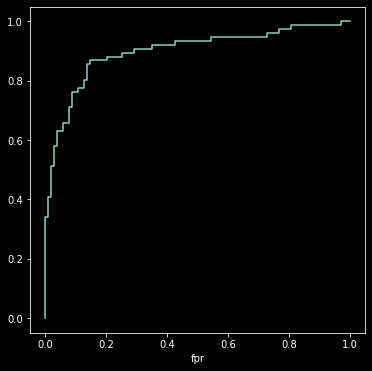

In [ ]:
roc.set_index('fpr')['tpr'].plot(figsize=(6,6))

In [ ]:
roc['random'] = roc['fpr']

In [ ]:
roc['ideal'] = 1

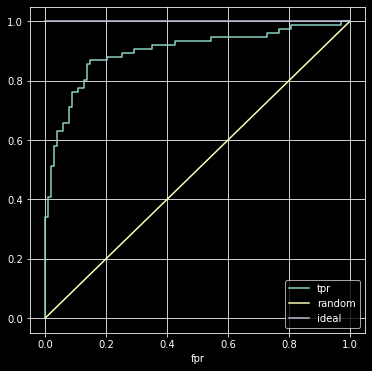

In [ ]:
roc.plot(x='fpr',y=['tpr','random','ideal'],figsize=(6,6),grid=True)

##AUC

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(test['survived'],test['score'])

0.8990802248339294

In [ ]:
X = ['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked']

cat_features = ['name', 'sex', 'ticket', 'cabin', 'embarked']

y = ['survived']

In [ ]:
params = {'cat_features' : cat_features,
            'verbose':100,
          'eval_metric': 'AUC',
          'random_seed':42,
          'learning_rate':0.01}

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	test: 0.7993193	best: 0.7993193 (0)	total: 5.18ms	remaining: 5.17s
100:	test: 0.8197413	best: 0.8202859 (99)	total: 754ms	remaining: 6.71s
200:	test: 0.8373043	best: 0.8373043 (200)	total: 1.51s	remaining: 6.01s
300:	test: 0.8446562	best: 0.8449285 (297)	total: 2.29s	remaining: 5.31s
400:	test: 0.8535058	best: 0.8539142 (399)	total: 3.15s	remaining: 4.7s
500:	test: 0.8570456	best: 0.8570456 (499)	total: 4.13s	remaining: 4.11s
600:	test: 0.8571818	best: 0.8575902 (594)	total: 4.95s	remaining: 3.29s
700:	test: 0.8578625	best: 0.8578625 (695)	total: 5.69s	remaining: 2.43s
800:	test: 0.8574541	best: 0.8584071 (735)	total: 6.36s	remaining: 1.58s
900:	test: 0.8569095	best: 0.8584071 (735)	total: 7.6s	remaining: 835ms
999:	test: 0.8545950	best: 0.8584071 (735)	total: 8.58s	remaining: 0us

bestTest = 0.8584070796
bestIteration = 735

Shrink model to first 736 iterations.
